In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/nicolelpepper/eds220-hwk2.git


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

*****SPECIAL NOTE FROM NICOLE:*
*I was having trouble committing sucessfully with this assignment. I went to Annie's office hours and she was able to help me figure it out. Since I had already completed task 2 and 3, I was not able to commit meanginfully along the way. I have since made extra commits but just wanted to point out why I don't have great commits and commit messages throughout the assignment.*

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

In [2]:
# FINAL CODE


## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [3]:
# a.

# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt

# Read in Salmon Data
catch_data = pd.read_csv('data/salmon_data.csv')

# Check out the first few observations in the Salmon Data
catch_data.head()

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [4]:
# b.
# Explore data types and observation values
print(catch_data.dtypes)
print("Max Year =", catch_data['Year'].max())
print("Min Year =", catch_data['Year'].min())

print("The unique species in the catch data are:",list(catch_data['Species'].unique()))
print("The unique regions in the catch data are:",list(catch_data['Region'].unique()))

Region          object
Year             int64
notesRegCode    object
Species         object
Catch           object
dtype: object
Max Year = 1997
Min Year = 1878
The unique species in the catch data are: ['Chinook', 'Sockeye', 'Coho', 'Pink', 'Chum']
The unique regions in the catch data are: ['SSE', 'NSE', 'YAK', 'GSE', 'BER', 'COP', 'PWS', 'CKI', 'BRB', 'KSK', 'YUK', 'NRS', 'KTZ', 'KOD', 'CHG', 'SOP', 'ALU', 'NOP']


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

- I used `dtypes` to see the data types for the different columns.
- I used `max` and `min` to find the max and min year.
- I used `unique` the find the unique values for the 'Species' and 'Region' columns.

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [5]:
# Inspect the notes column
notes_unique = catch_data['notesRegCode'].unique()
notes_unique

array([nan, 'Includes Yakutat catches',
       'Yakutat catch included in No SE AK catch',
       'Estimated from canned production, probably sockeye', 'No fishery',
       'Bering River catches included in Copper River catches',
       'Includes Bering River catches; estimated from canned',
       'Includes Bering River catches',
       'Coho and pink catch estimated from canned production',
       'Includes Bering River; coho and pink estimated fro canned',
       'Pink catch estimated from canned',
       'Includes Bering River; coho pink and chum estimated from canned',
       'Includes Bering River; pink estimated from canned',
       'Includes Bering River; pink and chum estimated from canned',
       'Includes Copper River catches',
       'Includes Copper River catches; coho catch porbably mostly pinks',
       'Eshamy District only',
       'Estimated from canned; excludes Resurrection Bay',
       'Estimated from canned production', 'No Resurrection Bay fishery',
       'Resu

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [6]:
# Remove the notes column
catch_data = catch_data.drop(columns =['notesRegCode'])
catch_data

,Region,Year,Species,Catch
0,SSE,1886,Chinook,0
1,SSE,1887,Chinook,0
2,SSE,1888,Chinook,0
3,SSE,1889,Chinook,0
4,SSE,1890,Chinook,0
...,...,...,...,...
8535,NOP,1993,Chum,135
8536,NOP,1994,Chum,84
8537,NOP,1995,Chum,99
8538,NOP,1996,Chum,68


<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


The region, year, and species are as expected but the catch column should be a numeric (integer) value instead of an object.

In [7]:
# Examine the column types in catch data
print(catch_data.dtypes)

Region     object
Year        int64
Species    object
Catch      object
dtype: object


<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [8]:
# Set catch column to numeric/integer type
# this fails because on of the observations is a string 'I'
catch_data['Catch'].astype('int64')"

SyntaxError: EOL while scanning string literal (3551258731.py, line 3)

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. 

In [9]:
# Find the row with observation containing "I" in the Catch Column
catch_I = catch_data.loc[ catch_data['Catch'] == 'I',['Region','Year','Species','Catch']]
catch_I

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

In [10]:
# part 1
# Reasign the value from "I" to 1 in the Catch Column
catch_data.loc[400, 'Catch'] = 1

# part 2
# Access the updated row to confirm the "I" value was updated to 1
catch_1 = catch_data.iloc[400]
catch_1

Region         GSE
Year          1955
Species    Chinook
Catch            1
Name: 400, dtype: object

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [11]:
# Update the catch column to be type int 64
catch_data['Catch'] = pd.to_numeric(catch_data['Catch'])

# Use dtypes to confirm that the Catch column type was updated to numeric
catch_column_type = catch_data['Catch'].dtypes
catch_column_type  

dtype('int64')

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [12]:
# Calculate the average catch by region and sort in ascending order
avg_region = catch_data.groupby('Region')['Catch'].mean()
avg_region

Region
ALU      40.383908
BER      16.372549
BRB    2709.796491
CHG     315.487273
CKI     683.571429
COP     179.223404
GSE     133.841463
KOD    1528.350000
KSK      67.642353
KTZ      18.836145
NOP     229.493478
NRS      51.502703
NSE    1825.020870
PWS    1419.236697
SOP    1110.942222
SSE    3184.660714
YAK      91.922917
YUK      68.645570
Name: Catch, dtype: float64

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

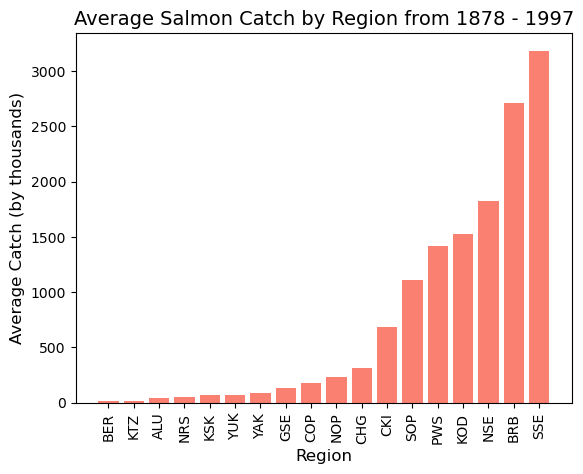

In [13]:
# Sort the avg catch data in ascending order
avg_sorted = catch_data.groupby('Region')['Catch'].mean().sort_values()

# Create a bar graph of estimated average salmon catches by region
plt.bar(avg_sorted.index, avg_sorted.values, color='salmon')
# Customize the graph
plt.title('Average Salmon Catch by Region from 1878 - 1997', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Catch (by thousands)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

This is my takeaway

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).